In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/DATA SCIENCE/Kaggle/vehiledata/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
print(df['Car_Name'].unique())
print(df['Seller_Type'].unique())
print(df['Kms_Driven'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Year'].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
final_dataset = df[['Car_Name','Kms_Driven','Fuel_Type','Transmission']]

In [10]:
final_dataset.head()

,Car_Name,Kms_Driven,Fuel_Type,Transmission
0,ritz,27000,Petrol,Manual
1,sx4,43000,Diesel,Manual
2,ciaz,6900,Petrol,Manual
3,wagon r,5200,Petrol,Manual
4,swift,42450,Diesel,Manual


In [11]:
final_dataset = pd.get_dummies(final_dataset,prefix = ['Fuel_Type','Transmission'],columns=['Fuel_Type','Transmission'])

In [12]:
final_dataset.head()

,Car_Name,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
0,ritz,27000,0,0,1,0,1
1,sx4,43000,0,1,0,0,1
2,ciaz,6900,0,0,1,0,1
3,wagon r,5200,0,0,1,0,1
4,swift,42450,0,1,0,0,1


In [13]:
final_dataset.corr()

,Kms_Driven,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
Kms_Driven,1.000000,0.012223,0.172515,-0.172874,0.162510,-0.162510
Fuel_Type_CNG,0.012223,1.000000,-0.040808,-0.160577,-0.032018,0.032018
Fuel_Type_Diesel,0.172515,-0.040808,1.000000,-0.979648,0.098643,-0.098643
Fuel_Type_Petrol,-0.172874,-0.160577,-0.979648,1.000000,-0.091013,0.091013
Transmission_Automatic,0.162510,-0.032018,0.098643,-0.091013,1.000000,-1.000000
Transmission_Manual,-0.162510,0.032018,-0.098643,0.091013,-1.000000,1.000000


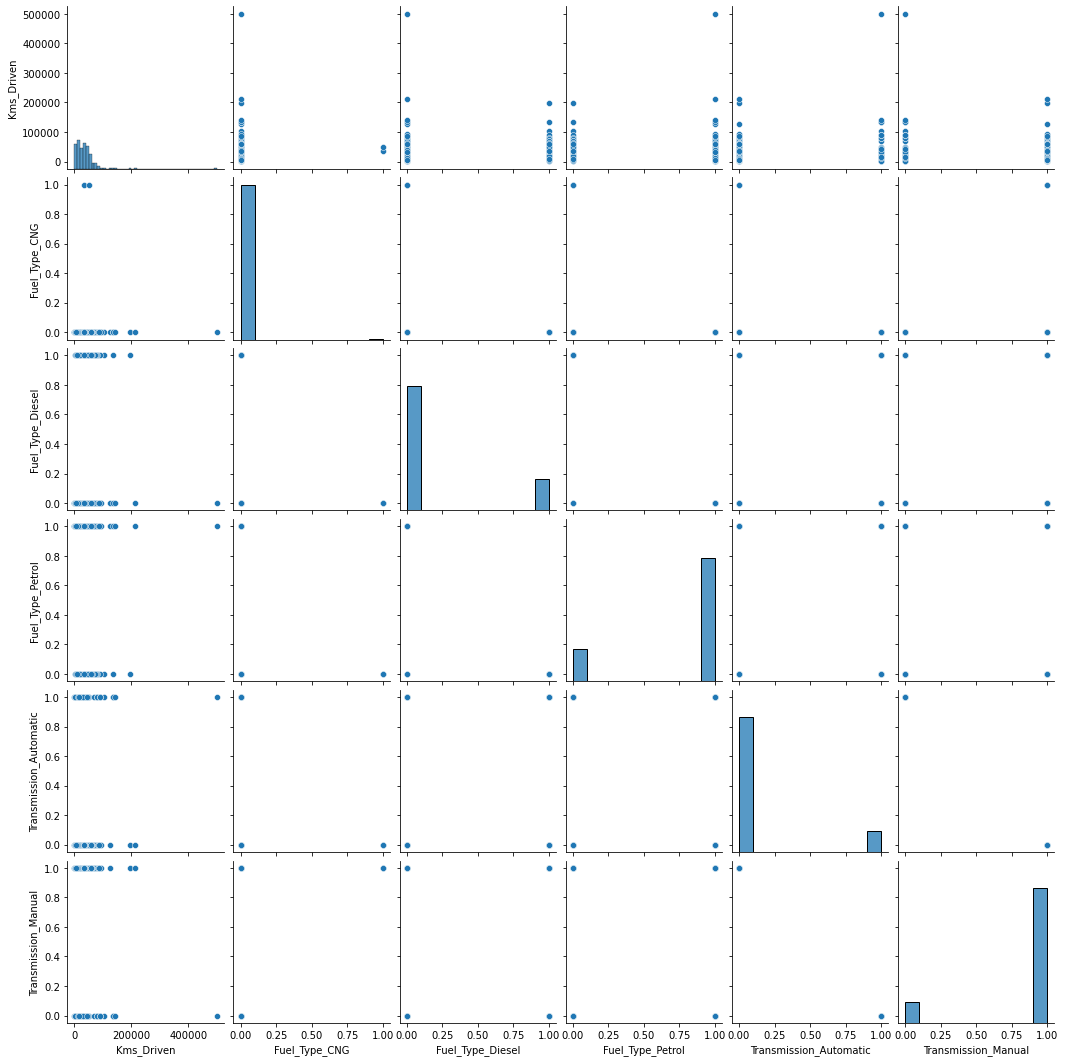

In [14]:
sns.pairplot(final_dataset)

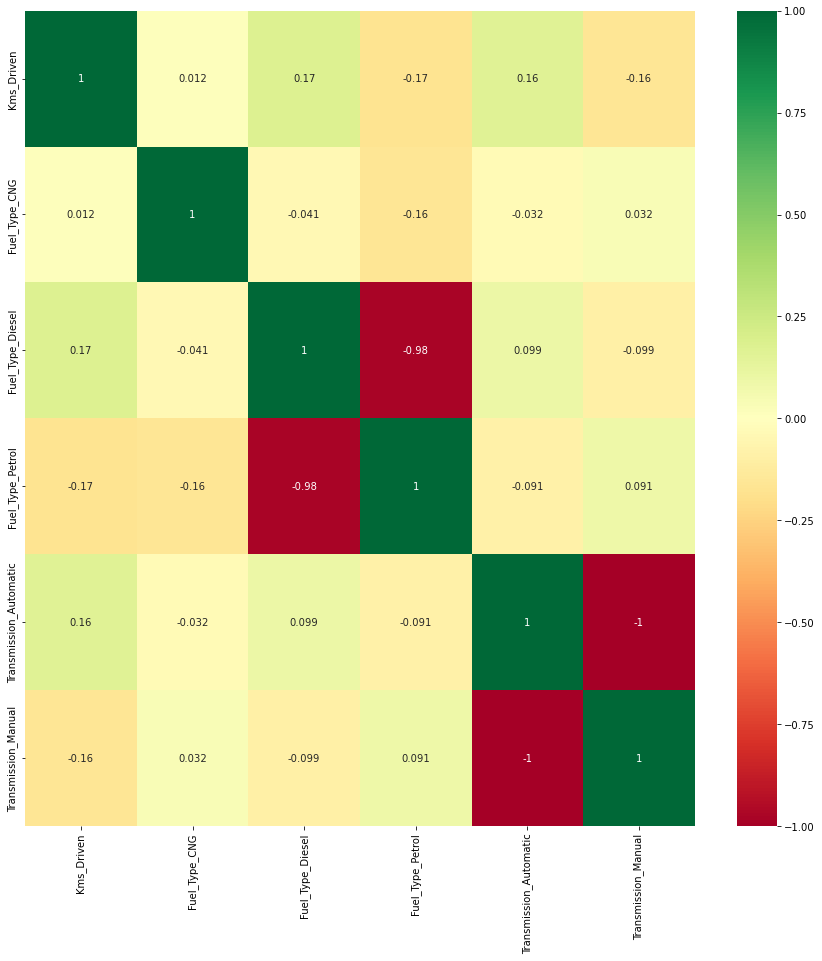

In [15]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<BarContainer object of 301 artists>

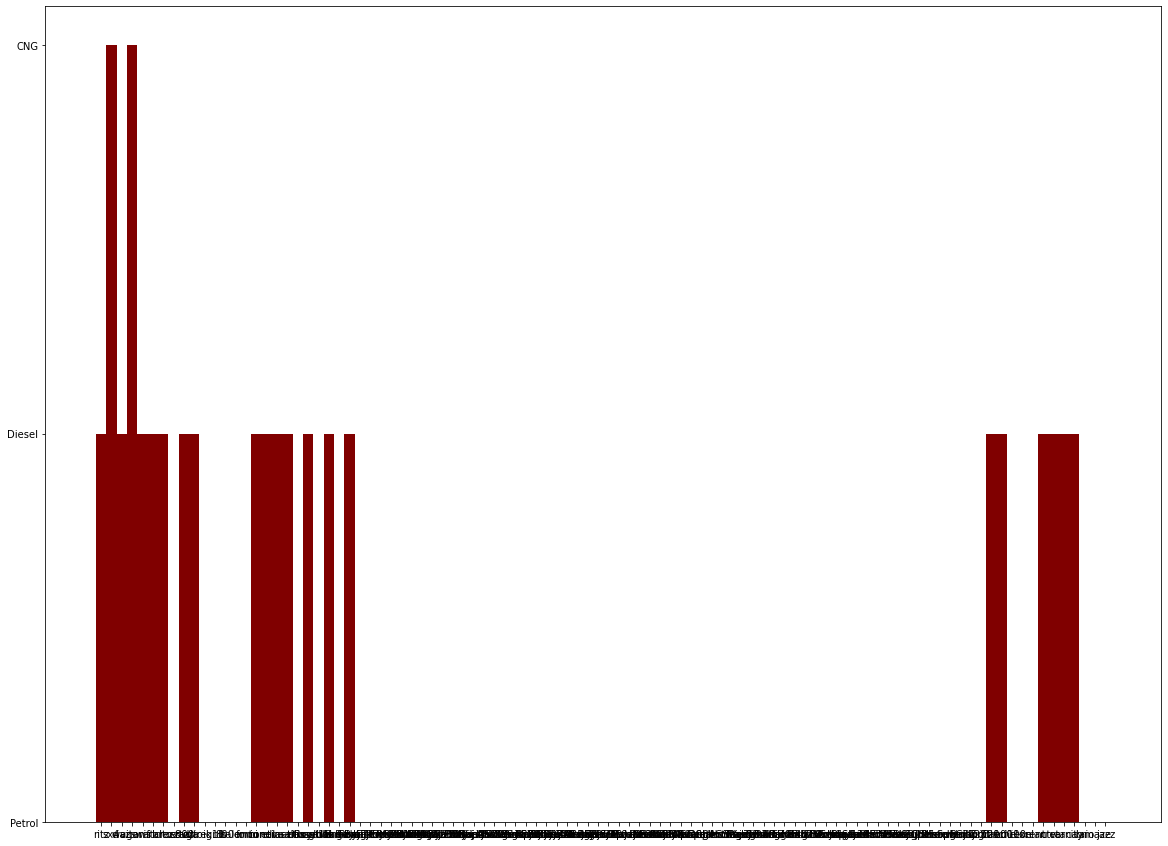

In [16]:
fig = plt.figure(figsize = (20,15))
plt.bar(df['Car_Name'],df['Fuel_Type'],color = 'maroon',width = 1)

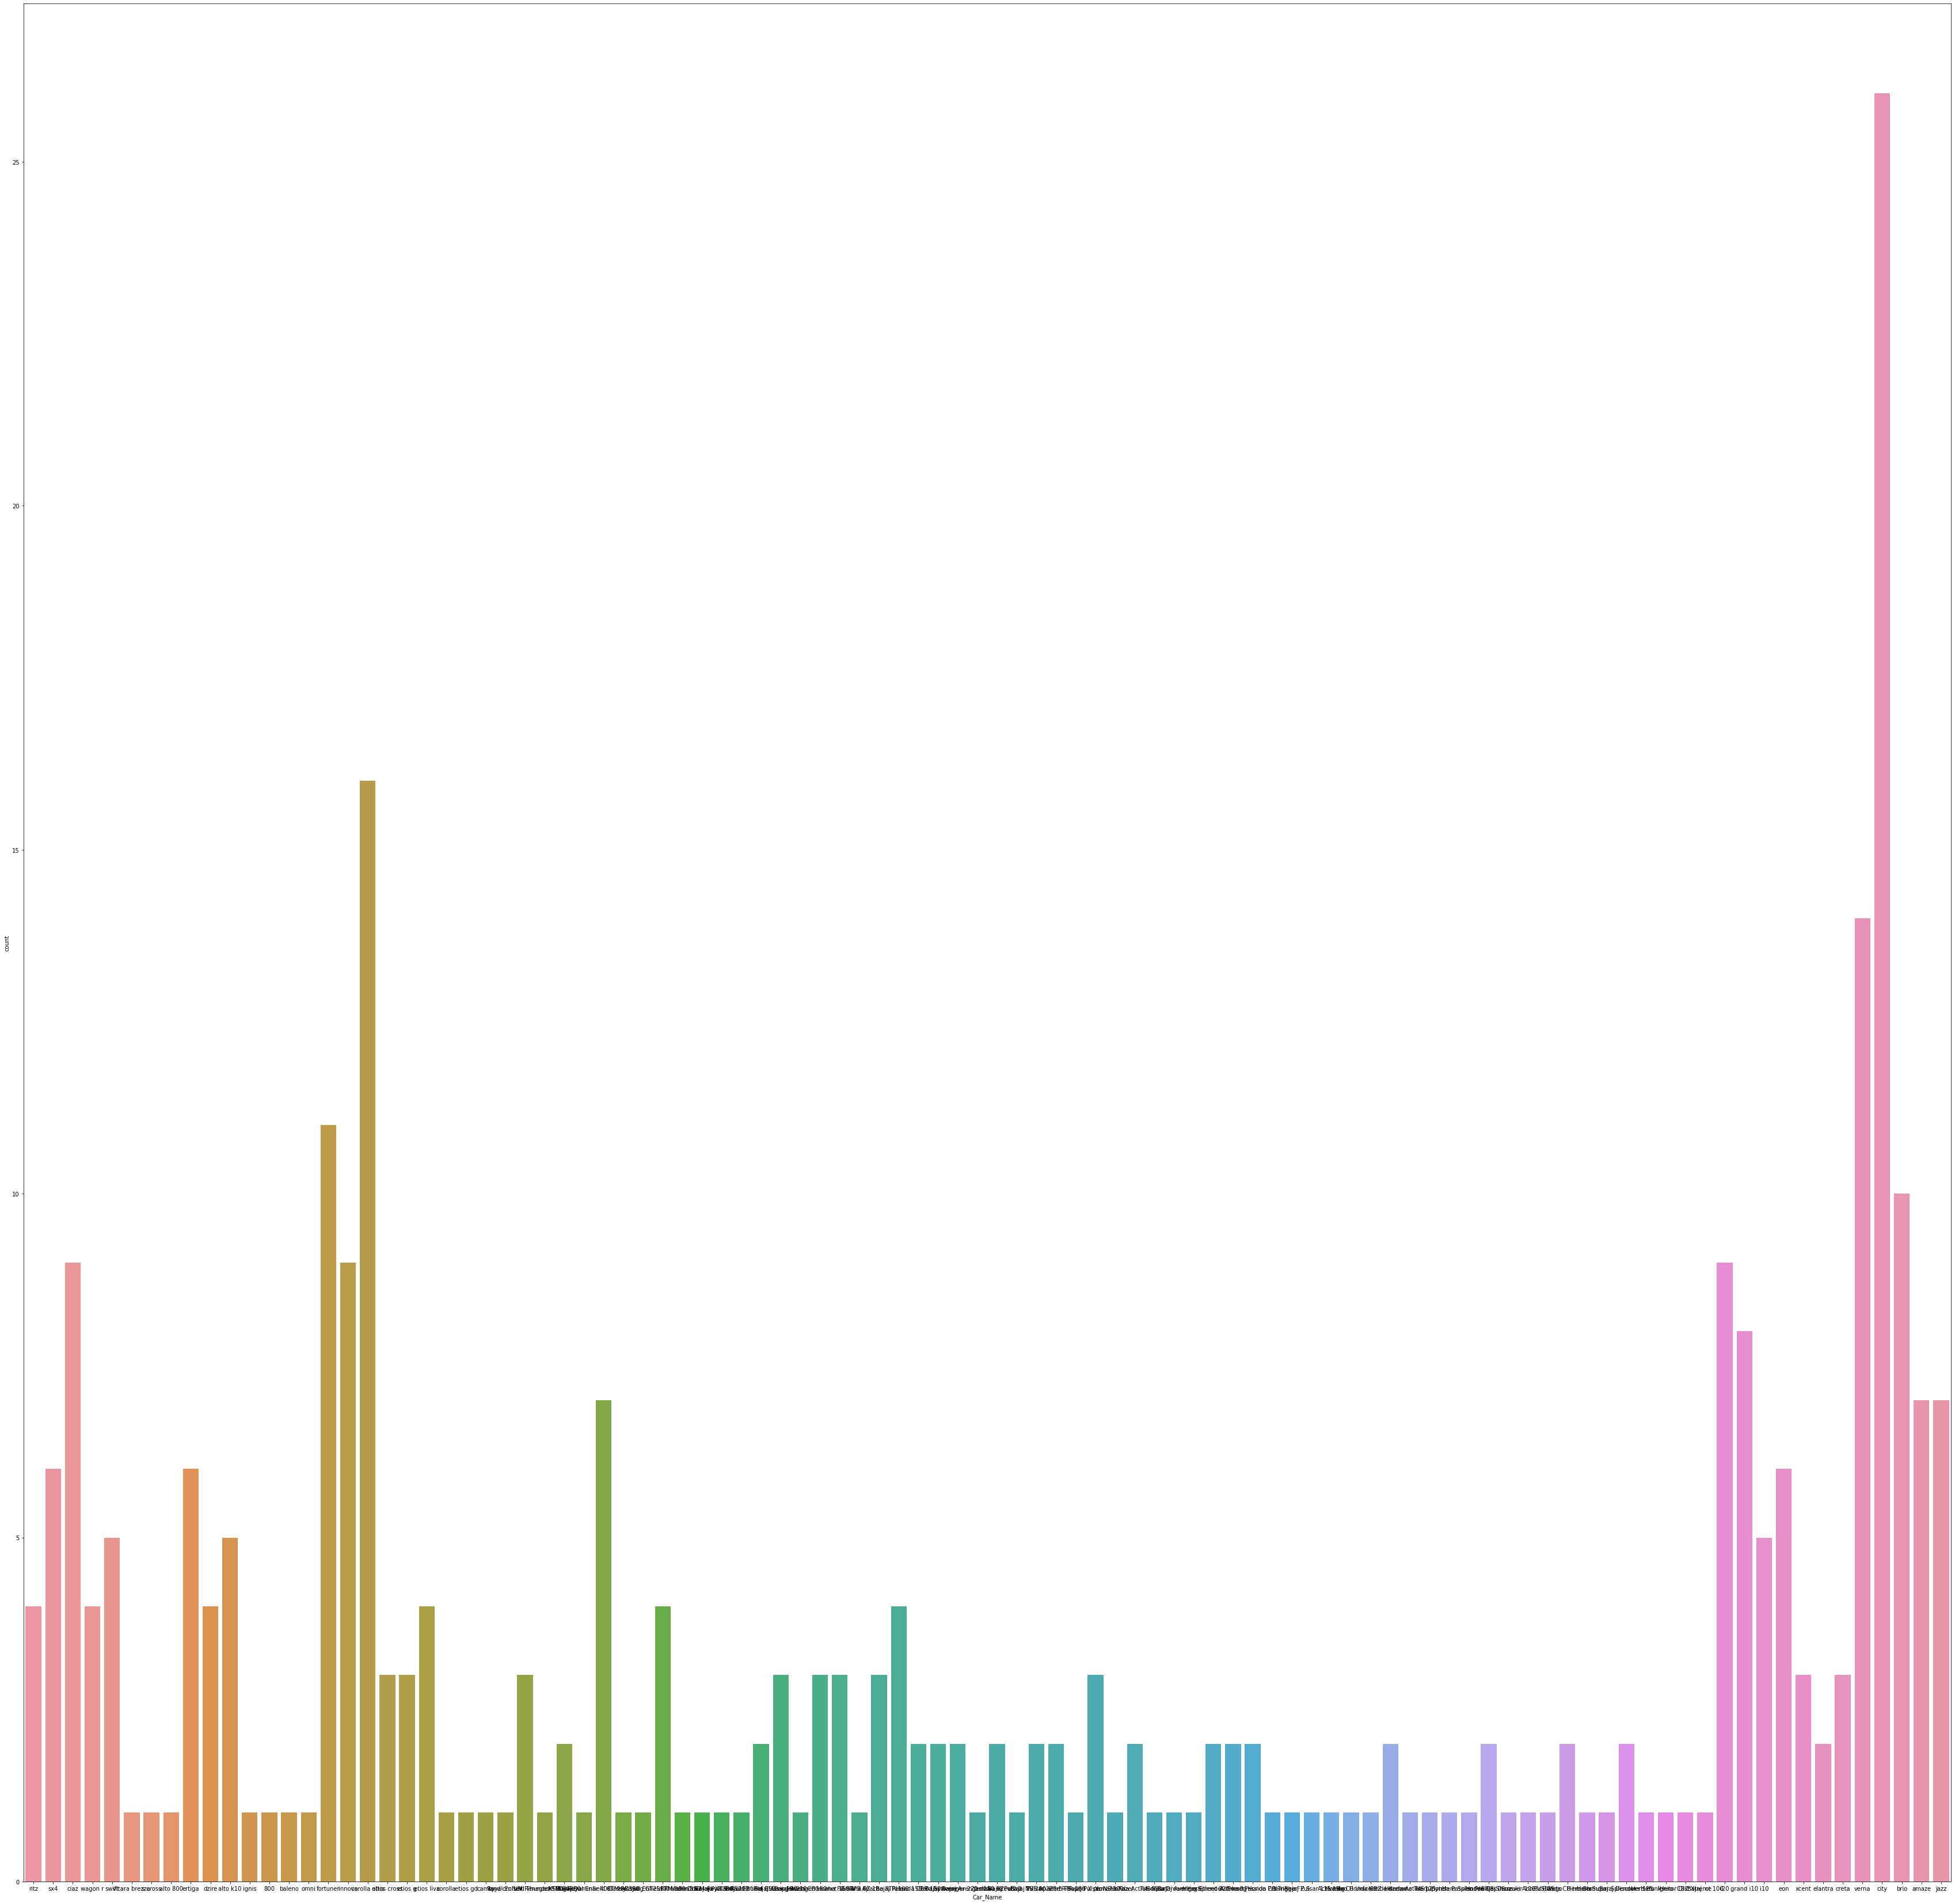

In [17]:
fig = plt.figure(figsize = (60,60))
sns.countplot(x = 'Car_Name', data = final_dataset)
plt.show()

From above data analysis its shown that Petrol cars and diesel car is widely use as compare to cng and when go through total car selling there is many brands in market but some of them are most popular and also sell mostly these brands like ciaz,fortuner,innova,city,varna,brio these data from 2003 to 2018 only

In [18]:
df_1 = pd.read_csv("C:\DATA SCIENCE\FeynnLabs_Intern\RTYB_Table_2.1_2015_to_2016.csv")

In [19]:
df_1.head()

,As on 31st March,Two Wheelers (as % age of total vehicle population),"Cars, Jeeps & Taxis (as % age of total vehicle population)",Buses @ (as % age of total vehicle population),Goods Vehicles (as % age of total vehicle population),Other Vehicles (as % age of total vehicle population),Total (Million),Unnamed: 7
0,1951.0,8.8,52.0,11.1,26.8,1.3,0.3,NaN
1,1961.0,13.2,46.6,8.6,25.3,6.3,0.7,NaN
2,1971.0,30.9,36.6,5.0,18.4,9.1,1.9,NaN
3,1981.0,48.6,21.5,3.0,10.3,16.6,5.4,NaN
4,1991.0,66.4,13.8,1.5,6.3,11.9,21.4,NaN


In [20]:
df_1.tail()

,As on 31st March,Two Wheelers (as % age of total vehicle population),"Cars, Jeeps & Taxis (as % age of total vehicle population)",Buses @ (as % age of total vehicle population),Goods Vehicles (as % age of total vehicle population),Other Vehicles (as % age of total vehicle population),Total (Million),Unnamed: 7
17,2013.0,72.7,13.6,1.0,4.7,8.0,176.0,NaN
18,2014.0,73.1,13.6,1.0,4.6,7.7,190.7,NaN
19,2015.0,73.5,13.6,1.0,4.4,7.5,210.0,NaN
20,2016.0,73.5,13.1,0.8,4.6,8.1,230.0,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   As on 31st March                                            21 non-null     float64
 1   Two Wheelers (as % age of total vehicle population)         21 non-null     float64
 2   Cars, Jeeps & Taxis (as % age of total vehicle population)  21 non-null     float64
 3   Buses @ (as % age of total vehicle population)              21 non-null     float64
 4   Goods Vehicles (as % age of total vehicle population)       21 non-null     float64
 5   Other Vehicles (as % age of total vehicle population)       21 non-null     float64
 6   Total (Million)                                             21 non-null     float64
 7   Unnamed: 7                                                  0 non-null      float64
dtypes: 

In [22]:
df_1.describe()

,As on 31st March,Two Wheelers (as % age of total vehicle population),"Cars, Jeeps & Taxis (as % age of total vehicle population)",Buses @ (as % age of total vehicle population),Goods Vehicles (as % age of total vehicle population),Other Vehicles (as % age of total vehicle population),Total (Million),Unnamed: 7
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,0.0
mean,1999.571429,62.790476,18.176190,2.242857,7.938095,8.847619,95.576190,NaN
std,18.299102,19.941111,11.660699,2.721869,6.770264,2.692140,70.519677,NaN
min,1951.000000,8.800000,12.700000,0.800000,4.400000,1.300000,0.300000,NaN
25%,2001.000000,70.100000,13.000000,1.100000,4.900000,8.100000,55.000000,NaN
50%,2006.000000,71.500000,13.500000,1.100000,5.200000,8.600000,89.600000,NaN
75%,2011.000000,72.200000,13.600000,1.400000,5.400000,9.400000,141.800000,NaN
max,2016.000000,73.500000,52.000000,11.100000,26.800000,16.600000,230.000000,NaN


In [23]:
df_1.isnull().sum()

As on 31st March                                               1
Two Wheelers (as % age of total vehicle population)            1
Cars, Jeeps & Taxis (as % age of total vehicle population)     1
Buses @ (as % age of total vehicle population)                 1
Goods Vehicles (as % age of total vehicle population)          1
Other Vehicles (as % age of total vehicle population)          1
Total (Million)                                                1
Unnamed: 7                                                    22
dtype: int64

In [24]:
df_1 = df_1.dropna(axis = 1,how = 'all')

In [25]:
df_1.isnull().sum()

As on 31st March                                              1
Two Wheelers (as % age of total vehicle population)           1
Cars, Jeeps & Taxis (as % age of total vehicle population)    1
Buses @ (as % age of total vehicle population)                1
Goods Vehicles (as % age of total vehicle population)         1
Other Vehicles (as % age of total vehicle population)         1
Total (Million)                                               1
dtype: int64

In [26]:
df_1.dropna()

,As on 31st March,Two Wheelers (as % age of total vehicle population),"Cars, Jeeps & Taxis (as % age of total vehicle population)",Buses @ (as % age of total vehicle population),Goods Vehicles (as % age of total vehicle population),Other Vehicles (as % age of total vehicle population),Total (Million)
0,1951.0,8.8,52.0,11.1,26.8,1.3,0.3
1,1961.0,13.2,46.6,8.6,25.3,6.3,0.7
2,1971.0,30.9,36.6,5.0,18.4,9.1,1.9
3,1981.0,48.6,21.5,3.0,10.3,16.6,5.4
4,1991.0,66.4,13.8,1.5,6.3,11.9,21.4
5,2001.0,70.1,12.8,1.2,5.4,10.5,55.0
6,2002.0,70.6,12.9,1.1,5.0,10.4,58.9
7,2003.0,70.9,12.8,1.1,5.2,10.0,67.0
8,2004.0,71.4,13.0,1.1,5.2,9.4,72.7
9,2005.0,72.1,12.7,1.1,4.9,9.1,81.5


In [27]:
df_1.isnull().sum()

As on 31st March                                              1
Two Wheelers (as % age of total vehicle population)           1
Cars, Jeeps & Taxis (as % age of total vehicle population)    1
Buses @ (as % age of total vehicle population)                1
Goods Vehicles (as % age of total vehicle population)         1
Other Vehicles (as % age of total vehicle population)         1
Total (Million)                                               1
dtype: int64

In [28]:
df_1.tail()

,As on 31st March,Two Wheelers (as % age of total vehicle population),"Cars, Jeeps & Taxis (as % age of total vehicle population)",Buses @ (as % age of total vehicle population),Goods Vehicles (as % age of total vehicle population),Other Vehicles (as % age of total vehicle population),Total (Million)
17,2013.0,72.7,13.6,1.0,4.7,8.0,176.0
18,2014.0,73.1,13.6,1.0,4.6,7.7,190.7
19,2015.0,73.5,13.6,1.0,4.4,7.5,210.0
20,2016.0,73.5,13.1,0.8,4.6,8.1,230.0
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   As on 31st March                                            21 non-null     float64
 1   Two Wheelers (as % age of total vehicle population)         21 non-null     float64
 2   Cars, Jeeps & Taxis (as % age of total vehicle population)  21 non-null     float64
 3   Buses @ (as % age of total vehicle population)              21 non-null     float64
 4   Goods Vehicles (as % age of total vehicle population)       21 non-null     float64
 5   Other Vehicles (as % age of total vehicle population)       21 non-null     float64
 6   Total (Million)                                             21 non-null     float64
dtypes: float64(7)
memory usage: 1.3 KB


Text(0, 0.5, 'Total million')

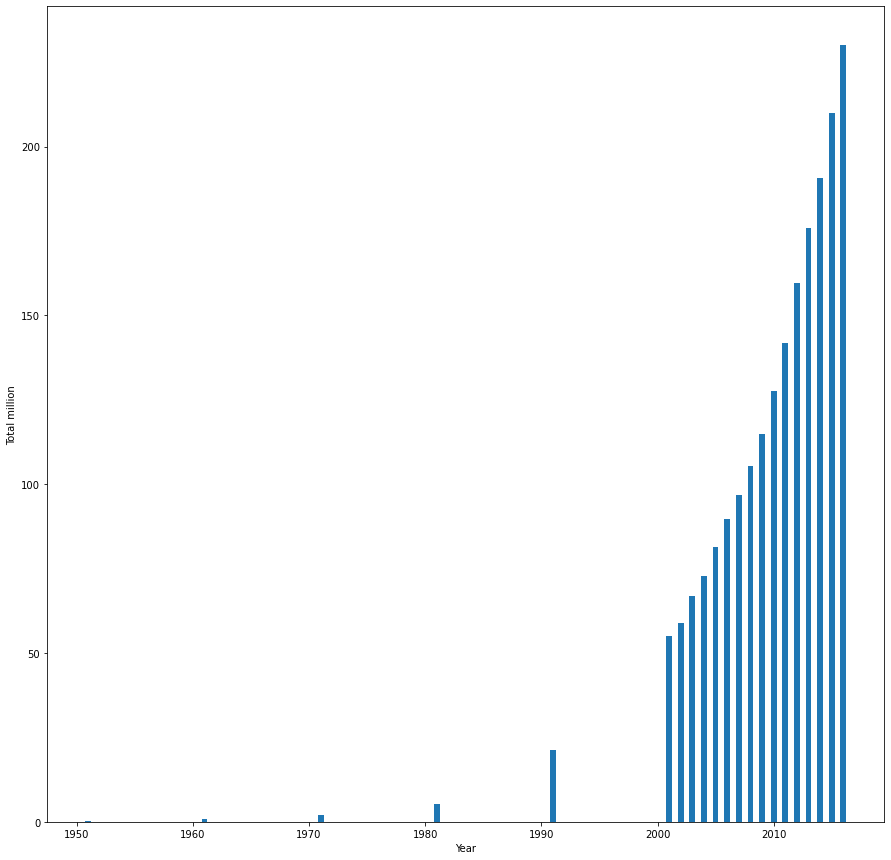

In [30]:
fig = plt.figure(figsize = (15,15))
plt.bar(df_1['As on 31st March'],df_1['Total (Million)'],width = 0.5)
plt.xlabel('Year')
plt.ylabel('Total million')

Text(0, 0.5, 'Two Wheelers')

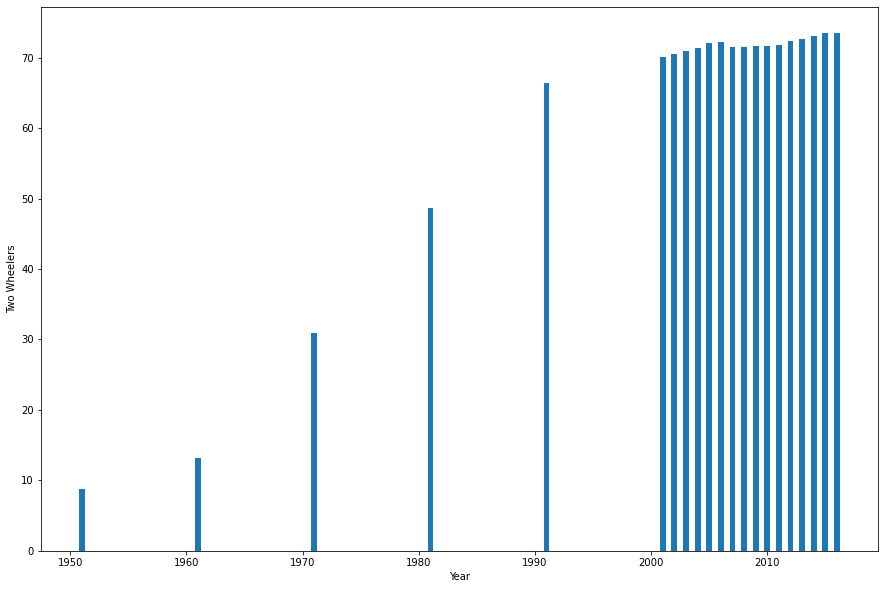

In [31]:
fig = plt.figure(figsize = (15,10))
plt.bar(df_1['As on 31st March'],df_1['Two Wheelers (as % age of total vehicle population)'],width = 0.5)
plt.xlabel('Year')
plt.ylabel('Two Wheelers')

Text(0, 0.5, 'Cars_jeeps_taxis')

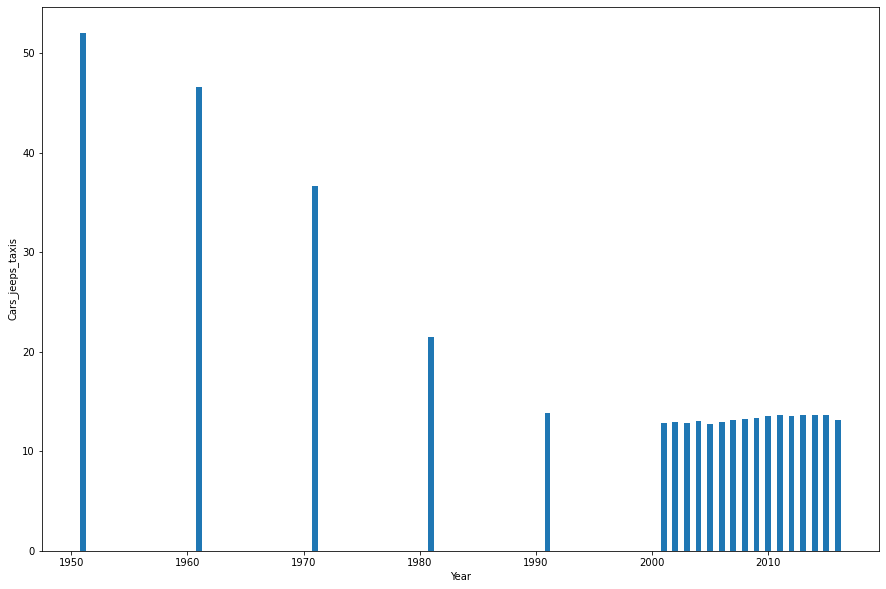

In [32]:
fig = plt.figure(figsize = (15,10))
plt.bar(df_1['As on 31st March'],df_1['Cars, Jeeps & Taxis (as % age of total vehicle population)'],width = 0.5)
plt.xlabel('Year')
plt.ylabel('Cars_jeeps_taxis')

Text(0, 0.5, 'Buses')

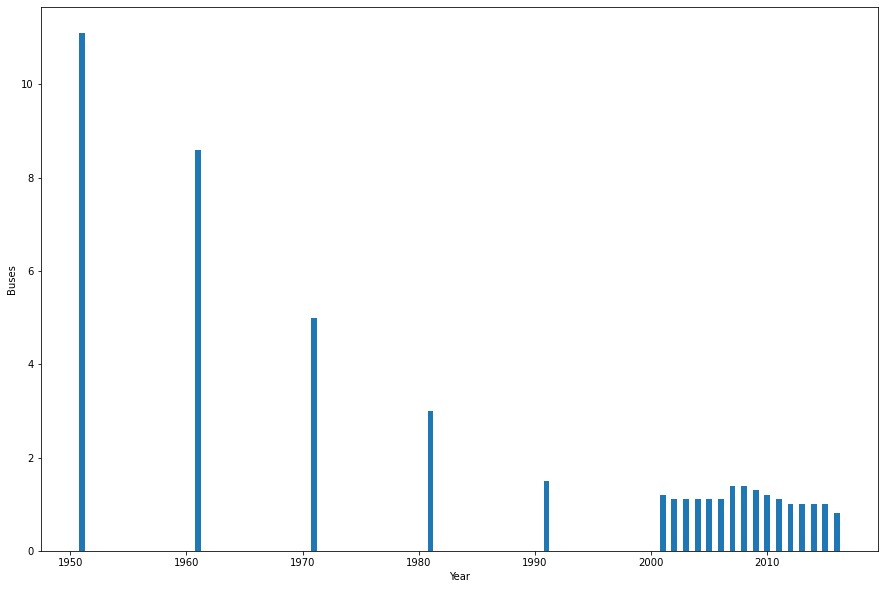

In [33]:
fig = plt.figure(figsize = (15,10))
plt.bar(df_1['As on 31st March'],df_1['Buses @ (as % age of total vehicle population)'],width = 0.5)
plt.xlabel('Year')
plt.ylabel('Buses')

Text(0, 0.5, 'Goods Vehicles')

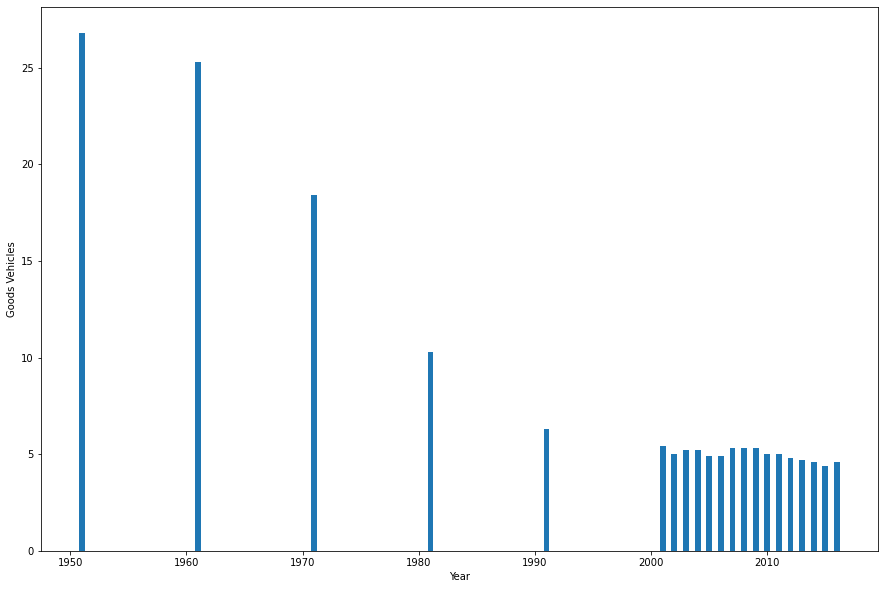

In [34]:
fig = plt.figure(figsize = (15,10))
plt.bar(df_1['As on 31st March'],df_1['Goods Vehicles (as % age of total vehicle population)'],width = 0.5)
plt.xlabel('Year')
plt.ylabel('Goods Vehicles')

Text(0, 0.5, 'Other Vehicles')

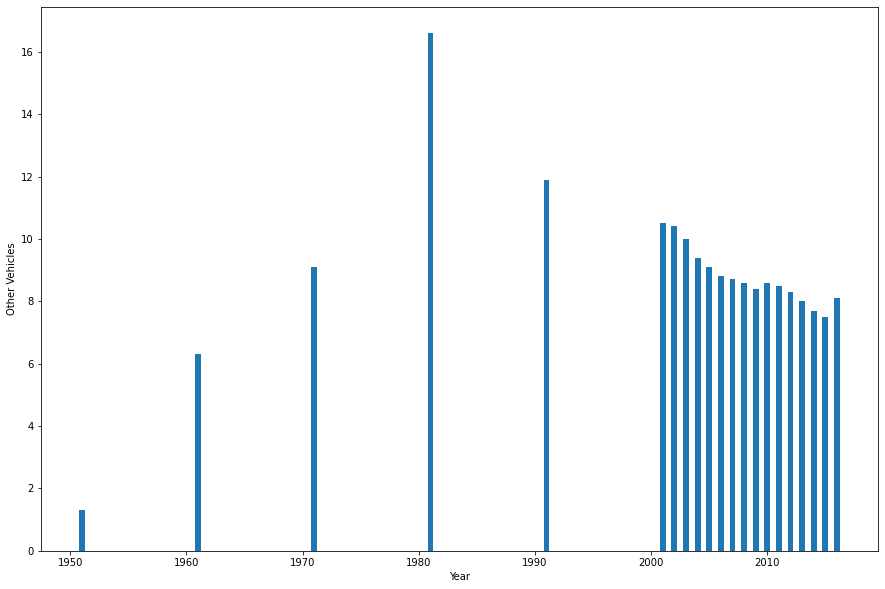

In [35]:
fig = plt.figure(figsize = (15,10))
plt.bar(df_1['As on 31st March'],df_1['Other Vehicles (as % age of total vehicle population)'],width = 0.5)
plt.xlabel('Year')
plt.ylabel('Other Vehicles')

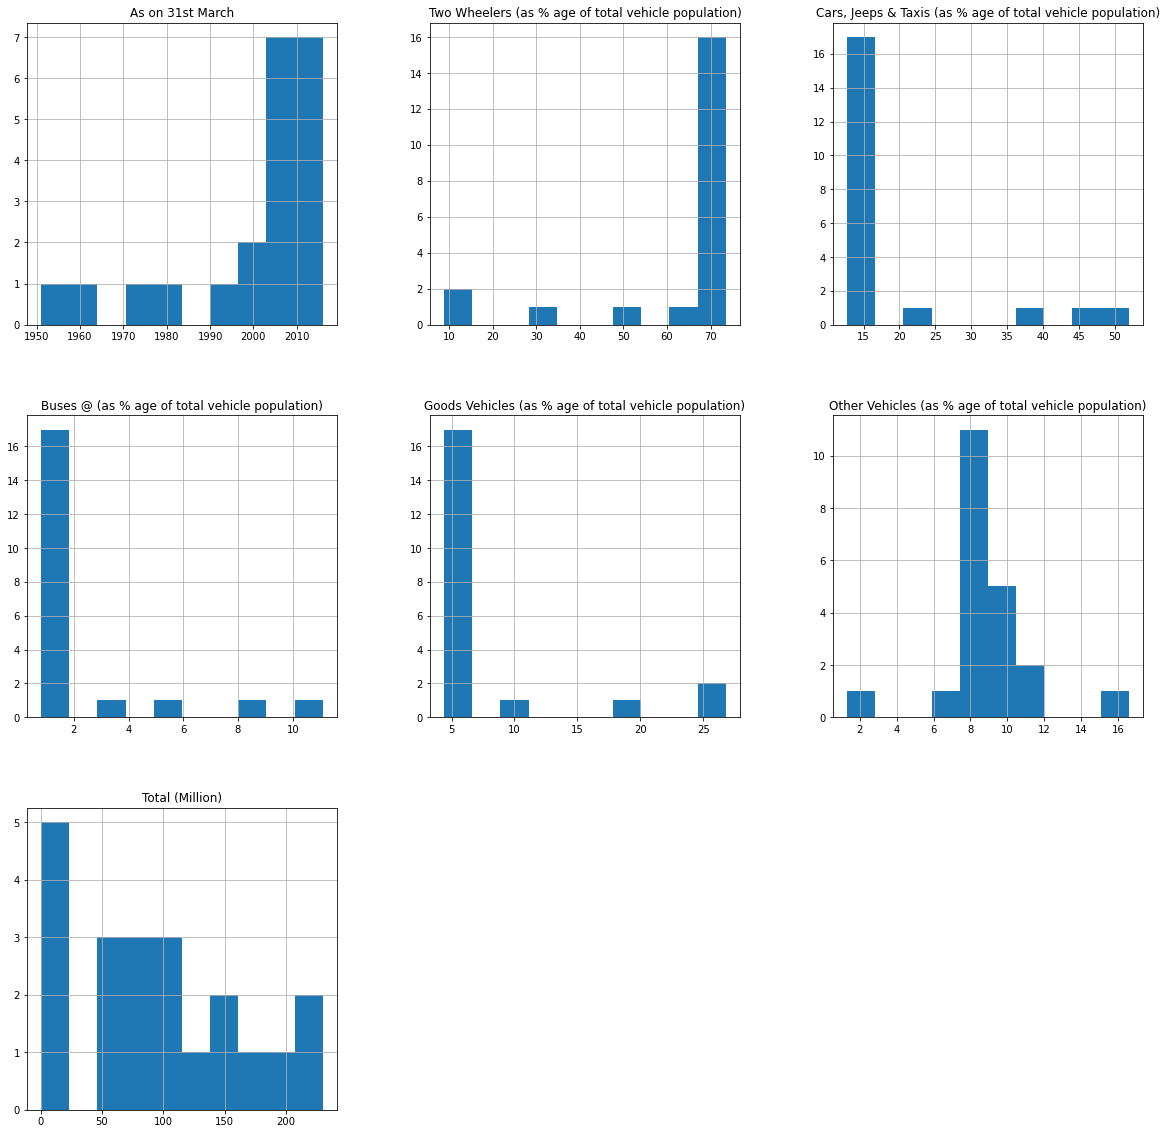

In [36]:
dist = df_1.hist(figsize=(20,20))

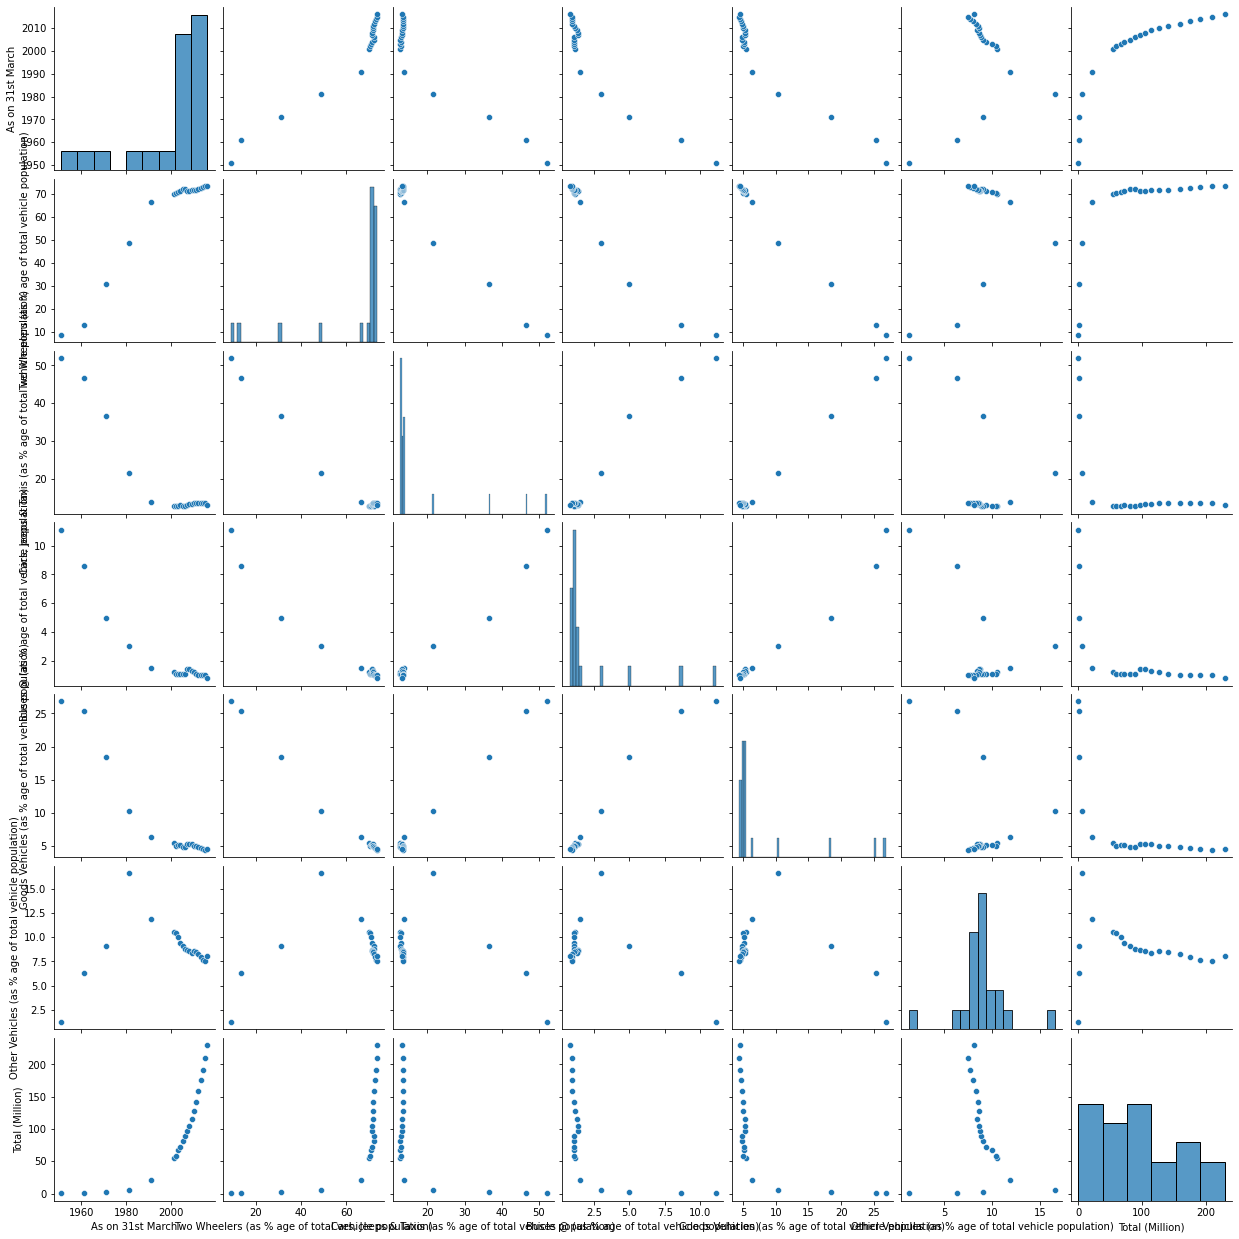

In [37]:
sns.pairplot(df_1)

its seen form above data in last 10 year from 2000 to 2010 huge amount of vehicle population %increase in all segments of vehicle sepeciallyin two wheelers and in Cars, Jeeps & Taxis	Buses, Goods Vehicles there is decrease in % population of vehicle and from last 10years its constant and in others vehicles %population is on peak in 1980 then it slightly decrease till 2010

In [38]:
df_2 = pd.read_csv("C:\DATA SCIENCE\FeynnLabs_Intern\8.1_rtyb_2004_05.csv")

In [39]:
df_2.head()

,STATES / UTs,Total,Motor Vehicle Tax,Commercial Vehicle and other fees,Passenger Tax,Goods Tax,Fines
0,Andhra Pradesh,109664.00,27325.00,6872.00,27383.00,39789.00,8295.00
1,Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN
2,Assam,14089.00,7215.00,1361.00,1234.00,NaN,4279.00
3,Bihar,13361.45,2081.39,4050.44,3079.87,3201.36,948.39
4,Chhattisgarh,16704.00,12742.00,1430.00,NaN,NaN,2532.00


In [40]:
df_2.tail()

,STATES / UTs,Total,Motor Vehicle Tax,Commercial Vehicle and other fees,Passenger Tax,Goods Tax,Fines
30,Dadra and Nagar Haveli,NaN,NaN,NaN,NaN,NaN,NaN
31,Daman and Diu,641.71,393.80,98.27,126.68,NaN,22.96
32,Delhi,NaN,NaN,NaN,NaN,NaN,NaN
33,Lakshadweep,3.50,NaN,NaN,NaN,NaN,NaN
34,Pondicherry,2337.00,1954.17,382.83,NaN,NaN,NaN


In [41]:
df_2.isnull().sum()

STATES / UTs                          0
Total                                 7
Motor Vehicle Tax                    11
Commercial Vehicle and other fees    14
Passenger Tax                        20
Goods Tax                            23
Fines                                18
dtype: int64

In [42]:
df_2 = df_2.dropna()

In [43]:
df_2.head()

,STATES / UTs,Total,Motor Vehicle Tax,Commercial Vehicle and other fees,Passenger Tax,Goods Tax,Fines
0,Andhra Pradesh,109664.00,27325.00,6872.00,27383.00,39789.00,8295.00
3,Bihar,13361.45,2081.39,4050.44,3079.87,3201.36,948.39
15,Manipur,399.16,230.76,101.94,25.52,35.56,5.38
20,Punjab,31930.00,9407.00,5934.00,19185.00,2001.00,2603.00
21,Rajasthan,72688.49,9241.77,19738.49,20536.62,13345.04,9826.57


In [44]:
df_2.isnull().sum()

STATES / UTs                         0
Total                                0
Motor Vehicle Tax                    0
Commercial Vehicle and other fees    0
Passenger Tax                        0
Goods Tax                            0
Fines                                0
dtype: int64

In [45]:
df_2.corr()

,Total,Motor Vehicle Tax,Commercial Vehicle and other fees,Passenger Tax,Goods Tax,Fines
Total,1.000000,0.911463,0.731193,0.918140,0.877286,0.816145
Motor Vehicle Tax,0.911463,1.000000,0.653660,0.793313,0.736421,0.513112
Commercial Vehicle and other fees,0.731193,0.653660,1.000000,0.663514,0.351246,0.675040
Passenger Tax,0.918140,0.793313,0.663514,1.000000,0.778106,0.833141
Goods Tax,0.877286,0.736421,0.351246,0.778106,1.000000,0.751394
Fines,0.816145,0.513112,0.675040,0.833141,0.751394,1.000000


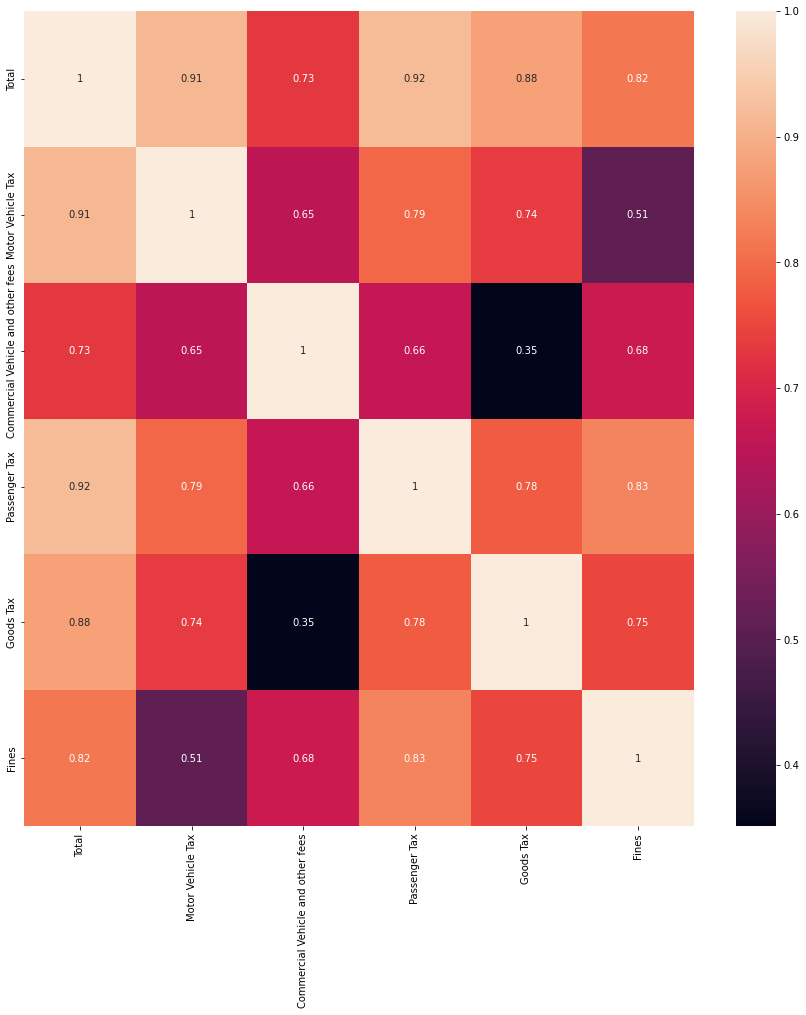

In [46]:
corrmat = df_2.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
g = sns.heatmap(df_2[top_corr_features].corr(),annot=True)

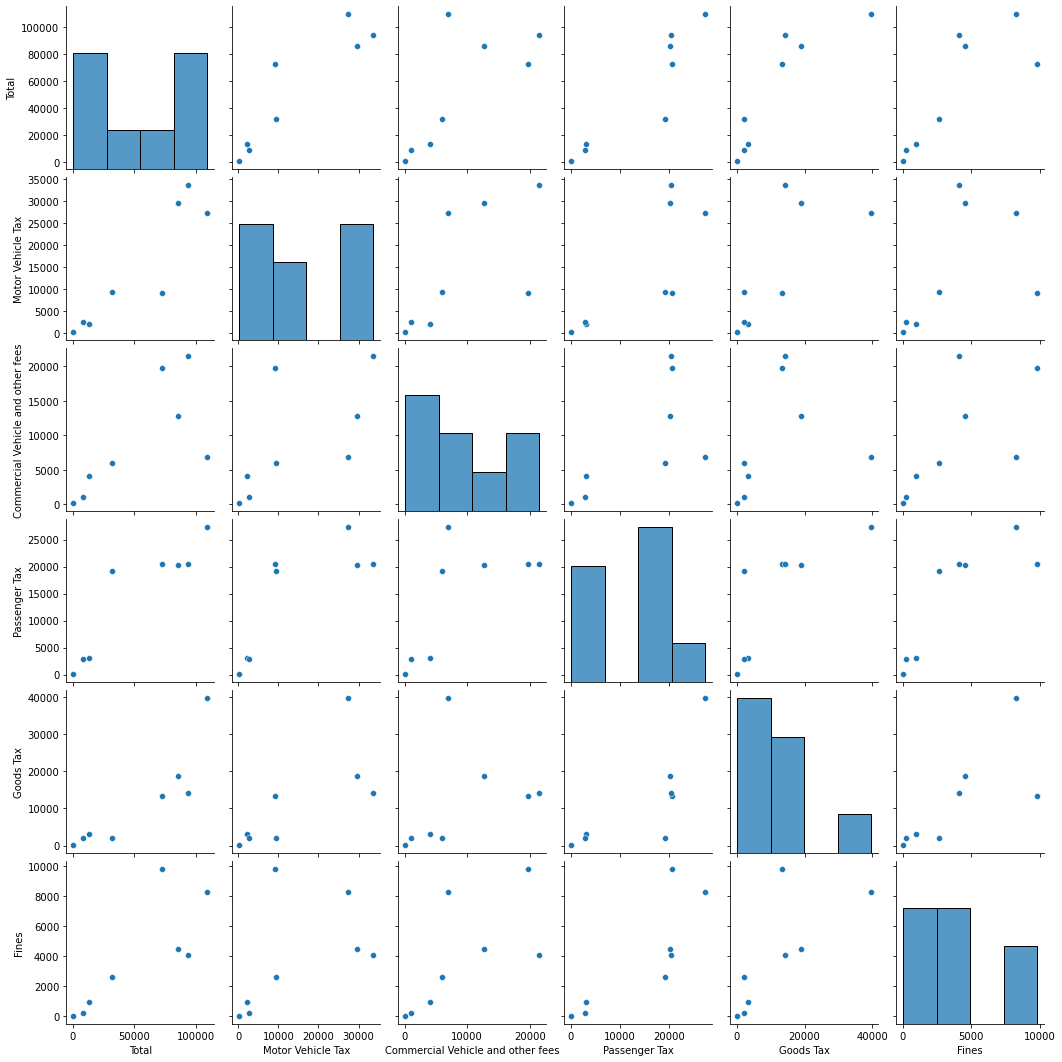

In [47]:
sns.pairplot(df_2)

Text(0, 0.5, 'Total tax and fees and fines')

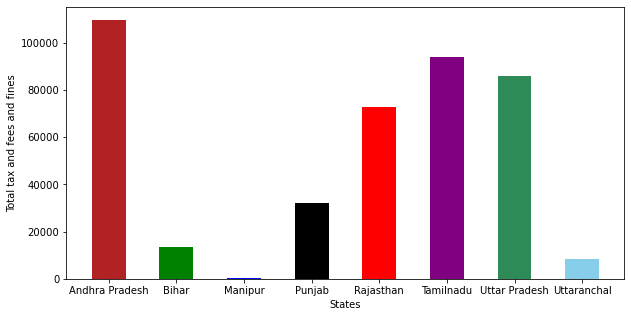

In [54]:
fig = plt.figure(figsize = (10,5))
plt.bar(df_2['STATES / UTs'],df_2['Total'],width = 0.5,color = ['firebrick', 'green', 'blue', 'black', 'red','purple', 'seagreen', 'skyblue', 'black', 'tomato'])
plt.xlabel('States')
plt.ylabel('Total tax and fees and fines')

<AxesSubplot:xlabel='STATES / UTs', ylabel='Motor Vehicle Tax'>

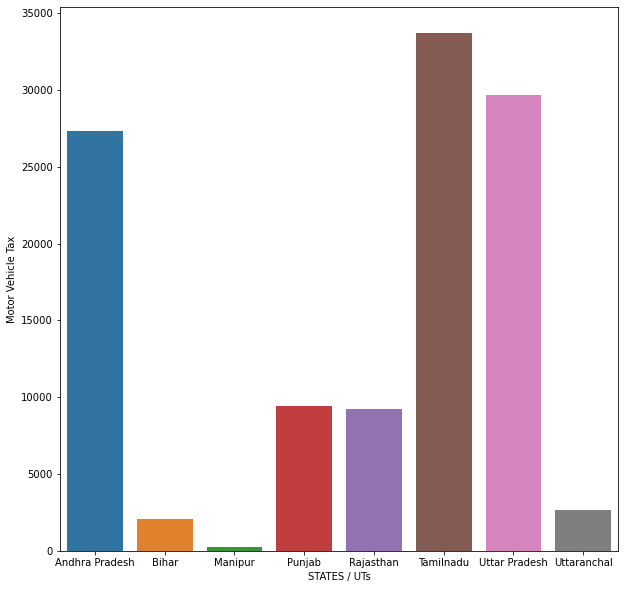

In [49]:
fig = plt.figure(figsize = (10,10))
sns.barplot(y = "Motor Vehicle Tax",x = 'STATES / UTs',data = df_2)

Text(0, 0.5, 'Fees on Vehicle')

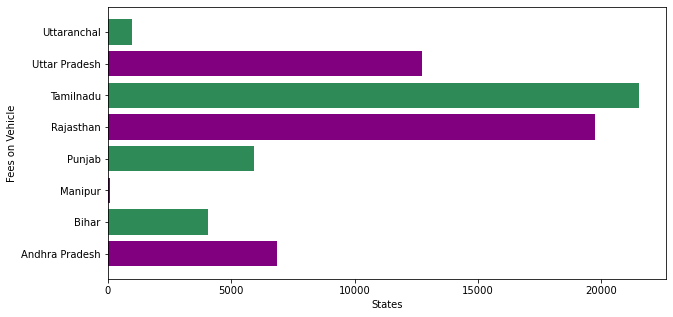

In [50]:
fig = plt.figure(figsize = (10,5))
plt.barh(df_2['STATES / UTs'],df_2['Commercial Vehicle and other fees'],color = ['purple', 'seagreen'])
plt.xlabel('States')
plt.ylabel('Fees on Vehicle')

<AxesSubplot:xlabel='STATES / UTs', ylabel='Passenger Tax'>

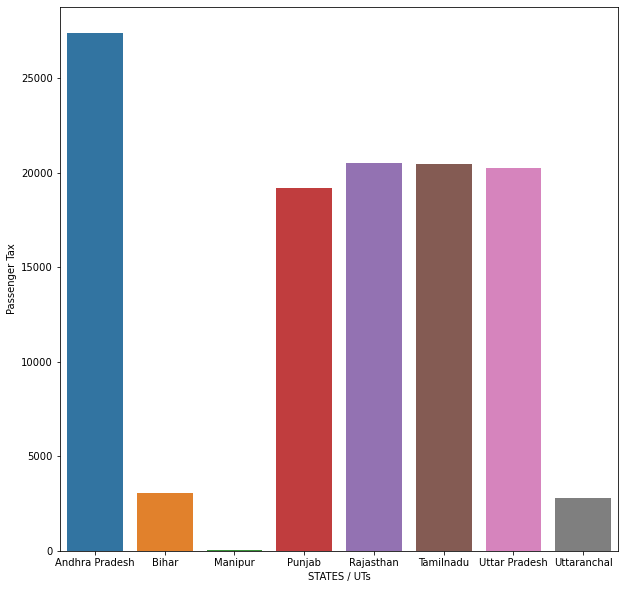

In [51]:
fig = plt.figure(figsize = (10,10))
sns.barplot(y='Passenger Tax',x='STATES / UTs',data=df_2)

Text(0, 0.5, 'TAX')

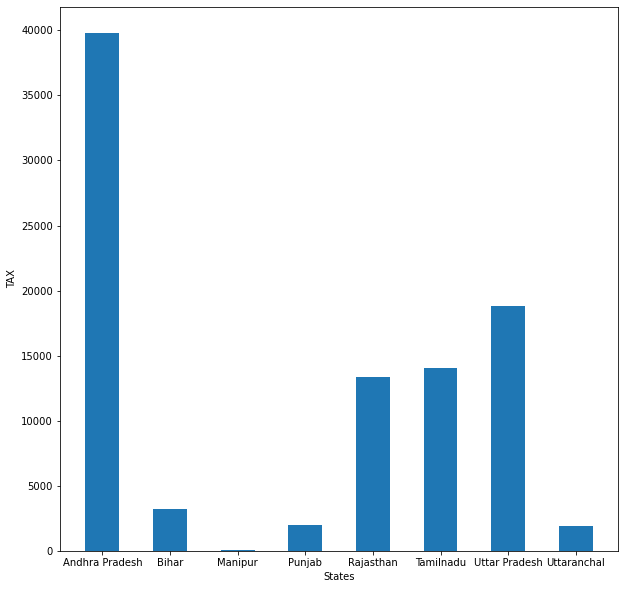

In [52]:
fig = plt.figure(figsize = (10,10))
plt.bar(df_2['STATES / UTs'],df_2['Goods Tax'],width = 0.5)
plt.xlabel('States')
plt.ylabel('TAX')

Text(0, 0.5, 'Fines')

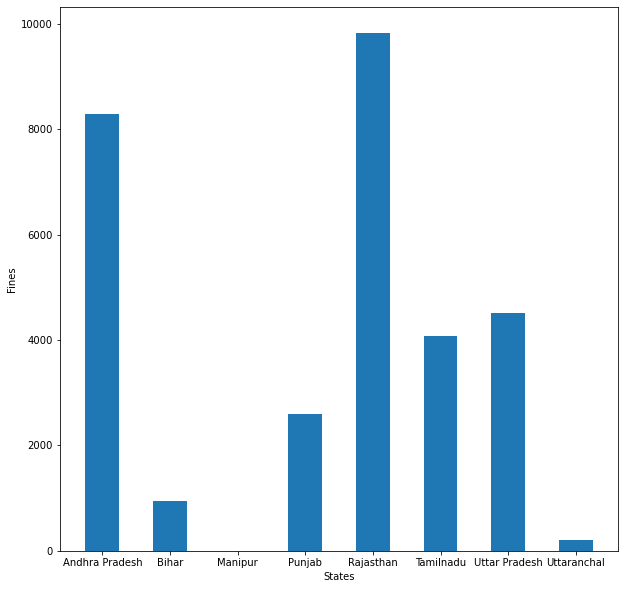

In [53]:
fig = plt.figure(figsize = (10,10))
plt.bar(df_2['STATES / UTs'],df_2['Fines'],width = 0.5)
plt.xlabel('States')
plt.ylabel('Fines')

we see from above data paramaters like Motor Vehicle Tax,Commercial Vehicle and other fees,Passenger Tax,Goods Tax,Fines find 
that as per the states tamilnadu and uttar pradesh have more tax on vehicles and lower tax in manipur,bihar,uttrachal 
and from fees paid on vehicle by states tamilnadu and rajastan spend commercial vehicle and other fees 
and andra pradesh spend more passangers tax and goods tax,if we see about fines on vehicles andhra pradesh,rajasthan pay more
fees totally see all about is andra pradesh is on top and on second last position tamilnadu 
